In [1]:
# This notebook was created for the Capstone project for IBM data science certification

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Print the statement as per course's assignment!
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
# load data from csv file into a dataframe
df = pd.read_csv('C:/Users/zahra/Documents/ML Courses/Car Collision Project/collisions_routieres.csv')
print(df.shape)
df.head()

(190552, 68)


,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LAT,LOC_LONG
0,SPVM _ 2012 _ 1,ME,2012/02/01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,...,0,NaN,276517.37950,5.035127e+06,A,3,O,N,45.45550,-73.86162
1,SPVM _ 2012 _ 2,SA,2012/06/02,66023.0,NaN,NaN,NaN,NaN,NaN,COTE VERTU ET AUT 40,...,0,NaN,287913.26000,5.038666e+06,A,3,N,O,45.48772,-73.71603
2,SPVM _ 2012 _ 3,JE,2012/06/28,66023.0,NaN,NaN,NaN,COTE VERTU,1.0,DECARIE,...,0,50.0,290518.82501,5.041617e+06,A,1,N,N,45.51432,-73.68279
3,SPVM _ 2012 _ 4,ME,2012/07/11,66023.0,NaN,NaN,NaN,ST MATHIEU,1.0,RENE LEVESQUE,...,0,50.0,298822.88600,5.039146e+06,A,3,N,N,45.49221,-73.57647
4,SPVM _ 2012 _ 5,LU,2012/01/02,66023.0,4849.0,NaN,NaN,ST JEAN,NaN,NaN,...,0,NaN,277433.35738,5.038881e+06,A,1,O,N,45.48932,-73.85011


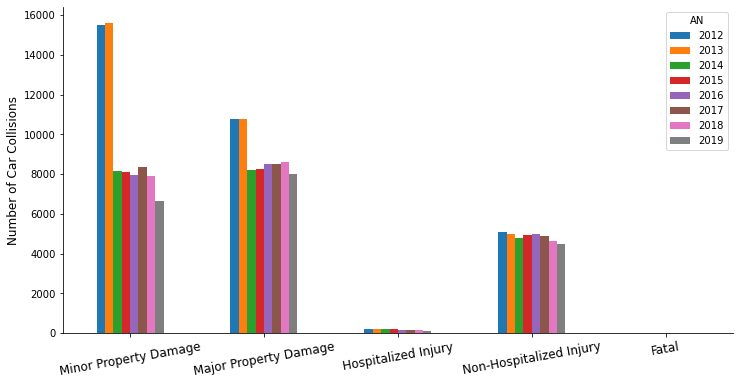

In [3]:
ax = df.groupby('AN').GRAVITE.value_counts().unstack(0).plot.bar(figsize=(12,6))
plt.ylabel('Number of Car Collisions', fontsize=12)
plt.xlabel('')
#plt.title('Annual Variations of car collision counts in different severity categories in the city of Montreal', fontsize=14)
locs, labels = plt.xticks()
plt.xticks(locs, ['Minor Property Damage', 'Major Property Damage', 'Hospitalized Injury', 'Non-Hospitalized Injury', 'Fatal'],rotation=10, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('C:/Users/zahra/Documents/ML Courses/Car Collision Project/Annual variations of car collision counts and severity.png')

In [4]:
# Keeping collison data entries for the most recent year, as this is the most relevant for the purpose of prediction
df = df[(df['AN']==2019)]
df.shape

(19296, 68)

In [5]:
# The accuracy of the geographical refrences are provided in columns LOC_COTE_QD, LOC_COTE_PD, LOC_IMPRECISION, LOC_DETACHEE
# I will filter the data that do not have an acceptable accuracy based on these columns. Based on provided Metadata, I will keep
# data with quality A1NN, A2NN.
df.groupby(['LOC_COTE_QD', 'LOC_COTE_PD', 'LOC_IMPRECISION', 'LOC_DETACHEE']).size()

LOC_COTE_QD  LOC_COTE_PD  LOC_IMPRECISION  LOC_DETACHEE
A            1            N                N               12327
                                           O                2322
                          O                N                1359
                                           O                 108
             2            N                N                1531
                                           O                 111
                          O                N                 366
                                           O                  33
             3            N                N                 261
                                           O                  71
                          O                N                  37
                                           O                   5
B            4            N                N                 627
C            4            N                N                 137
dtype: int64

In [6]:
# removing data with low quality
df_A = df[ (df['LOC_COTE_QD'] == 'A') & ((df['LOC_COTE_PD'] == 1 ) | (df['LOC_COTE_PD'] == 2)) & (df['LOC_IMPRECISION'] == 'N') & (df['LOC_DETACHEE'] == 'N')]
df_A.drop(['LOC_COTE_QD','LOC_COTE_PD','LOC_IMPRECISION','LOC_DETACHEE'], axis=1, inplace=True)
df_A.shape

C:\Users\zahra\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(13858, 64)

In [7]:
# The data has many columns and information. I  selected the following columns to work with as I am hoping to find some feature 
# that are correlated with the Severity of the collision and can be used for prediction:
df_sub = df_A[['GRAVITE','DT_ACCDN','HEURE_ACCDN', 'CD_ETAT_SURFC','CD_ECLRM','CD_ENVRN_ACCDN','CD_CATEG_ROUTE', 'CD_LOCLN_ACCDN',
                'CD_CONFG_ROUTE','CD_COND_METEO','CD_GENRE_ACCDN']]
df_sub.rename(columns={'GRAVITE':'Severity', 'DT_ACCDN':'Date', 'HEURE_ACCDN':'Hour', 'CD_ETAT_SURFC':'Condition', 'CD_ECLRM':'Daylight',
                       'CD_ENVRN_ACCDN':'Zone','CD_CATEG_ROUTE':'Category','CD_LOCLN_ACCDN':'Location',
                       'CD_CONFG_ROUTE':'Configuration','CD_COND_METEO':'Weather','CD_GENRE_ACCDN':'Type'}, inplace=True)

df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
#df_sub.head()

(13858, 11)


C:\Users\zahra\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
# Check data distribution for severity of a collision
print(df_sub['Severity'].value_counts())

Dommages matériels seulement                            5800
Dommages matériels inférieurs au seuil de rapportage    4325
Léger                                                   3603
Grave                                                    109
Mortel                                                    21
Name: Severity, dtype: int64


In [9]:
# We have 5 types of collisions with respect to severity, described in the Metadata as below:
# 1. Dommages matériels inférieurs au seuil de rapportage (Property damage below the reportable threshold): No casualties, and the damage assessment
# is lower or equal to the reporting threshold (threshold of$ 2,000 since March 2010)
# 2. Dommages matériels seulement (Property Damage Only): No casualties, and the damage assessment is higher at the reporting threshold 
# 3. Léger (light): Only one or more victims slightly injured (injuries not requiring hospitalization or observation of the person, even if they 
# require treatment from a doctor or in a hospital center)
# 4. Grave (Severe): No fatalities and at least one victim seriously injured (injuries requiring hospitalization, including those for which the 
# person remains under observation in hospital)
# 5. Mortel (Deadly): At least one victim died within 30 days of the accident

# One hot encoding to change to binary 
df_dummy = pd.get_dummies(df_sub.Severity)
df_dummy.rename(columns={'Dommages matériels seulement':'MinorPropertyDamage',
                         'Dommages matériels inférieurs au seuil de rapportage':'MajorPropertyDamage'}, inplace=True)
# Lump together collisions with most severe outcome (types 3, 4, 5) that involve injury or death: 
#df_dummy['Injury'] = df_dummy['Grave'] + df_dummy['Mortel'] + df_dummy['Léger']
#df_dummy.drop(['Léger', 'Mortel', 'Grave'], axis=1, inplace=True) 
df_dummy['Injury'] = df_dummy['Grave'] + df_dummy['Léger'] + df_dummy['Mortel']

# put back the three categories together, 1: Minor Property Damage, 2: Major Property Damge, 3: Injury
df_dummy['SeverityFlag'] = df_dummy['MinorPropertyDamage']*1 + df_dummy['MajorPropertyDamage']*2  + df_dummy['Injury']*3

# Remove the original column and add the severity flags to the dataframe
df_sub.drop(['Severity'], axis=1, inplace=True)
df_sub = pd.concat([df_sub,df_dummy[['SeverityFlag']]], axis=1)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(13858, 11)


,Date,Hour,Condition,Daylight,Zone,Category,Location,Configuration,Weather,Type,SeverityFlag
0,2019/01/02,08:00:00-08:59:00,18.0,1.0,3.0,13.0,32.0,3.0,11.0,31.0,2
1,2019/01/02,22:00:00-22:59:00,16.0,3.0,3.0,13.0,32.0,4.0,11.0,31.0,3
2,2019/01/03,11:00:00-11:59:00,12.0,1.0,3.0,13.0,32.0,3.0,12.0,31.0,2
3,2019/01/03,Non précisé,15.0,3.0,3.0,13.0,32.0,3.0,11.0,31.0,1
4,2019/01/05,08:00:00-08:59:00,12.0,1.0,2.0,14.0,33.0,2.0,11.0,31.0,1


In [10]:
# Let's see what are the most common categories for the features I have selected and filter categories with not sufficient data
print(df_sub['Condition'].value_counts())
print(df_sub['Daylight'].value_counts())
print(df_sub['Zone'].value_counts())
print(df_sub['Category'].value_counts())
print(df_sub['Location'].value_counts())
print(df_sub['Configuration'].value_counts())
print(df_sub['Weather'].value_counts())
print(df_sub['Type'].value_counts())

11.0    8718
12.0    2416
16.0    1276
18.0     505
15.0     229
17.0     219
99.0      27
13.0      24
14.0      16
19.0       4
20.0       3
Name: Condition, dtype: int64
1.0    9001
3.0    3644
2.0     758
4.0      60
Name: Daylight, dtype: int64
2.0    6556
3.0    5865
4.0     657
1.0     294
7.0      72
5.0      56
9.0      34
6.0       6
Name: Zone, dtype: int64
13.0    7966
14.0    4771
11.0     365
12.0     305
19.0     142
15.0      68
Name: Category, dtype: int64
32.0    6733
33.0    3514
34.0    2787
31.0      55
37.0      37
39.0      34
35.0      14
38.0       8
36.0       5
Name: Location, dtype: int64
3.0    4618
2.0    4222
1.0    3456
5.0     671
4.0     457
9.0      45
Name: Configuration, dtype: int64
11.0    9549
12.0    1709
14.0    1052
17.0     755
15.0     118
18.0      93
19.0      69
16.0      40
99.0      28
13.0       8
Name: Weather, dtype: int64
31.0    10475
32.0     1070
33.0      596
59.0      190
99.0      187
42.0      130
40.0      128
41.0       99


In [11]:
# For road condition, either road is dry or it is not dry and deemed to be problematic.
# Fort I remove data entries with unspecified road condition classes, then define a binary valued column to have values 1 if the
#road is dry and 0 otherwise. 
#11 Dry
#12 Wet
#13 Water accumulation 
#14 Sand, gravel on the road
#15 Slush
#16 Snowy
#17 Hardened snow
#18 Icy
#19 Muddy
#20 Oily
#99 Other
#   Unspecified


# first drop Other/unspecified data entries
df_sub.dropna(how='any', subset=['Condition'], inplace=True)
df_sub = df_sub[(df_sub['Condition']!=99)]

# Rearrange this classification to: 1. dry conditions, 2. not dry conditions when conditions on the road might make the 
#possibility of collision with severe outcome higher and change this parameter to a binary value: 1 if dry, 0 otherwise
df_dummy = pd.get_dummies(df_sub.Condition)
df_dummy = df_dummy[[11]]
df_dummy.rename(columns={11:'ClearWeather'}, inplace=True)
df_sub.drop(['Condition'], axis=1, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(13410, 11)


,Date,Hour,Daylight,Zone,Category,Location,Configuration,Weather,Type,SeverityFlag,ClearWeather
0,2019/01/02,08:00:00-08:59:00,1.0,3.0,13.0,32.0,3.0,11.0,31.0,2,0
1,2019/01/02,22:00:00-22:59:00,3.0,3.0,13.0,32.0,4.0,11.0,31.0,3,0
2,2019/01/03,11:00:00-11:59:00,1.0,3.0,13.0,32.0,3.0,12.0,31.0,2,0
3,2019/01/03,Non précisé,3.0,3.0,13.0,32.0,3.0,11.0,31.0,1,0
4,2019/01/05,08:00:00-08:59:00,1.0,2.0,14.0,33.0,2.0,11.0,31.0,1,0


In [12]:
# Treating Daylight classes
# first drop data entries without daylight info
df_sub.dropna(how='any', subset=['Daylight'], inplace=True)
# Daylight has 4 categories: 1. Day and light, 2. Day and half darkness, 3. Night and lighted path, 4. Night and unlit path
# I rearrange this classification to: 1. daylight, 2. not daylight, i.e. when lighting might be an issue (categories 2, 3 and 4 
# lumped together); and change this parameter to a binary value: 1 if daylight, 0 otherwise
df_dummy = pd.get_dummies(df_sub.Daylight)
df_dummy.drop([2.0,3.0,4.0], axis=1, inplace=True)
df_dummy.rename(columns={1.0:'Daylight'}, inplace=True)
# remove the original column
df_sub.drop(['Daylight'], axis=1, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(13278, 11)


,Date,Hour,Zone,Category,Location,Configuration,Weather,Type,SeverityFlag,ClearWeather,Daylight
0,2019/01/02,08:00:00-08:59:00,3.0,13.0,32.0,3.0,11.0,31.0,2,0,1
1,2019/01/02,22:00:00-22:59:00,3.0,13.0,32.0,4.0,11.0,31.0,3,0,0
2,2019/01/03,11:00:00-11:59:00,3.0,13.0,32.0,3.0,12.0,31.0,2,0,1
3,2019/01/03,Non précisé,3.0,13.0,32.0,3.0,11.0,31.0,1,0,0
4,2019/01/05,08:00:00-08:59:00,2.0,14.0,33.0,2.0,11.0,31.0,1,0,1


In [13]:
# I will keep the top 4 Zone classes 1: School, 2: Residential, 3: Business / Commercial and 4: Industrial / manufacturing
df_sub = df_sub[(df_sub.Zone==1.0) | (df_sub.Zone==2.0) | (df_sub.Zone==3.0) | (df_sub.Zone==4.0)]
# One Hot Encoding
df_dummy = pd.get_dummies(df_sub.Zone)
df_dummy.rename(columns={1.0:'School',2.0:'Residential',3.0:'Commercial',4.0:'Industrial'}, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
# remove the original column and one of the one hot encoding columns as it is redundant info (we can define 1 from the other 3)
df_sub.drop(['Zone','School'], axis=1, inplace=True)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(13007, 13)


,Date,Hour,Category,Location,Configuration,Weather,Type,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial
0,2019/01/02,08:00:00-08:59:00,13.0,32.0,3.0,11.0,31.0,2,0,1,0,1,0
1,2019/01/02,22:00:00-22:59:00,13.0,32.0,4.0,11.0,31.0,3,0,0,0,1,0
2,2019/01/03,11:00:00-11:59:00,13.0,32.0,3.0,12.0,31.0,2,0,1,0,1,0
3,2019/01/03,Non précisé,13.0,32.0,3.0,11.0,31.0,1,0,0,0,1,0
4,2019/01/05,08:00:00-08:59:00,14.0,33.0,2.0,11.0,31.0,1,0,1,1,0,0


In [14]:
# I will keep the top 4 Category types:
# 11: Public road: slip road / motorway collector / service road
# 12: Public path: numbered road
# 13: Public road: main artery
# 14: Public road: residential street

df_sub = df_sub[(df_sub.Category==11) | (df_sub.Category==12) | (df_sub.Category==13) | (df_sub.Category==14)]

# One Hot Encoding
df_dummy = pd.get_dummies(df_sub.Category)
df_dummy.rename(columns={11:'Motorway',12:'NumberedRoad',13:'MainArtery',14:'ResidentialStreet'}, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
# remove the original column and one of the one hot encoding columns as it is redundant info (we can define 1 from the other 3)
df_sub.drop(['Category','NumberedRoad'], axis=1, inplace=True)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(12770, 15)


,Date,Hour,Location,Configuration,Weather,Type,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet
0,2019/01/02,08:00:00-08:59:00,32.0,3.0,11.0,31.0,2,0,1,0,1,0,0,1,0
1,2019/01/02,22:00:00-22:59:00,32.0,4.0,11.0,31.0,3,0,0,0,1,0,0,1,0
2,2019/01/03,11:00:00-11:59:00,32.0,3.0,12.0,31.0,2,0,1,0,1,0,0,1,0
3,2019/01/03,Non précisé,32.0,3.0,11.0,31.0,1,0,0,0,1,0,0,1,0
4,2019/01/05,08:00:00-08:59:00,33.0,2.0,11.0,31.0,1,0,1,1,0,0,0,0,1


In [15]:
# I will keep the top 3 Location types as we don't have enough data for the other types for statistical convergence:
# 32: Intersection (less than 5 meters)
# 33: Near an intersection / roundabout
# 34: Between intersections (100 meters and more)
df_sub = df_sub[(df_sub.Location==32) | (df_sub.Location==33) | (df_sub.Location==34)]

# One Hot Encoding
df_dummy = pd.get_dummies(df_sub.Location)
df_dummy.rename(columns={32:'Intersection',33:'NearIntersection',34:'BetweenIntersection'}, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
# remove the original column and one of the one hot encoding columns as it is redundant info (we can define 1 from the others)
df_sub.drop(['Location','BetweenIntersection'], axis=1, inplace=True)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(12239, 16)


,Date,Hour,Configuration,Weather,Type,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet,Intersection,NearIntersection
0,2019/01/02,08:00:00-08:59:00,3.0,11.0,31.0,2,0,1,0,1,0,0,1,0,1,0
1,2019/01/02,22:00:00-22:59:00,4.0,11.0,31.0,3,0,0,0,1,0,0,1,0,1,0
2,2019/01/03,11:00:00-11:59:00,3.0,12.0,31.0,2,0,1,0,1,0,0,1,0,1,0
3,2019/01/03,Non précisé,3.0,11.0,31.0,1,0,0,0,1,0,0,1,0,1,0
4,2019/01/05,08:00:00-08:59:00,2.0,11.0,31.0,1,0,1,1,0,0,0,0,1,0,1


In [16]:
# I will keep the top 5 Configuration types:
# 1: One way
# 2: Two directions, one lane per direction
# 3: Two directions, more than one lane per direction
# 4: Separated by passable development
# 5: Separated by impassable development
# 9: Other (e.g .: beacons, left turn lane in both directions)
df_sub = df_sub[(df_sub.Configuration==1) | (df_sub.Configuration==2) | (df_sub.Configuration==3) |
                (df_sub.Configuration==4) | (df_sub.Configuration==5)]
# One Hot Encoding
df_confg = pd.get_dummies(df_sub.Configuration)
df_confg.rename(columns={1:'OneWay',2:'TwoWay_OneLane',3:'TwoWay_MultiLane',4:'Passable',5:'Impassable'}, inplace=True)
df_sub = pd.concat([df_sub,df_confg], axis=1)
# remove the original column and one of the one hot encoding columns as it is redundant info (we can define 1 from the others)
df_sub.drop(['Configuration','Impassable'], axis=1, inplace=True)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(12113, 19)


,Date,Hour,Weather,Type,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet,Intersection,NearIntersection,OneWay,TwoWay_OneLane,TwoWay_MultiLane,Passable
0,2019/01/02,08:00:00-08:59:00,11.0,31.0,2,0,1,0,1,0,0,1,0,1,0,0,0,1,0
1,2019/01/02,22:00:00-22:59:00,11.0,31.0,3,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,2019/01/03,11:00:00-11:59:00,12.0,31.0,2,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,2019/01/03,Non précisé,11.0,31.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,2019/01/05,08:00:00-08:59:00,11.0,31.0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0


In [17]:
# For weather, I use similar approach to daylight and road surface condition. Either weather is clear or deemed to be problematic.
# I will remove data entries with unspecified weather classes. 
# 11 Clear
# 12 Overcast (cloudy / dark)
# 13 Fog / haze
# 14 Rain / drizzle
# 15 Downpour (heavy rain)
# 16 Strong wind (no blowing snow, no rain)
# 17 Snow / hail
# 18 Blowing snow / snowstorm
# 19 Ice
# 99 Other
#    Unspecified

# first drop Other/unsspecified data entries
df_sub.dropna(how='any', subset=['Weather'], inplace=True)
df_sub = df_sub[(df_sub['Weather']!=99)]

# and change this parameter to a binary value: 1 if clear, 0 otherwise
df_dummy = pd.get_dummies(df_sub.Weather)
df_dummy = df_dummy[[11.0]]
df_dummy.rename(columns={11.0:'ClearWeather'}, inplace=True)
df_sub.drop(['Weather'], axis=1, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(12041, 19)


,Date,Hour,Type,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet,Intersection,NearIntersection,OneWay,TwoWay_OneLane,TwoWay_MultiLane,Passable,ClearWeather
0,2019/01/02,08:00:00-08:59:00,31.0,2,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
1,2019/01/02,22:00:00-22:59:00,31.0,3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1
2,2019/01/03,11:00:00-11:59:00,31.0,2,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,2019/01/03,Non précisé,31.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1
4,2019/01/05,08:00:00-08:59:00,31.0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1


In [18]:
# I will keep the top 4 Type classes 31: Collision with road vehicle, 32: Collision with pedestrian, 33: Collision with cyclist,
# 59 Fixed object: other fixed object

df_sub = df_sub[(df_sub.Type==31.0) | (df_sub.Type==32.0) | (df_sub.Type==33.0) | (df_sub.Type==59.0)]
# One Hot Encoding
df_dummy = pd.get_dummies(df_sub.Type)
df_dummy.rename(columns={31.0:'RoadVehicle',32.0:'Pedestrian',33.0:'Cyclist',59.0:'FixedObject'}, inplace=True)
df_sub = pd.concat([df_sub,df_dummy], axis=1)
# remove the original column and one of the one hot encoding columns as it is redundant info (we can define 1 from the other 3)
df_sub.drop(['Type','FixedObject'], axis=1, inplace=True)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
df_sub.head()

(10824, 21)


,Date,Hour,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,...,Intersection,NearIntersection,OneWay,TwoWay_OneLane,TwoWay_MultiLane,Passable,ClearWeather,RoadVehicle,Pedestrian,Cyclist
0,2019/01/02,08:00:00-08:59:00,2,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0
1,2019/01/02,22:00:00-22:59:00,3,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,0
2,2019/01/03,11:00:00-11:59:00,2,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,2019/01/03,Non précisé,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0
4,2019/01/05,08:00:00-08:59:00,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [19]:
# Handling of Date and Hour

# remove data entries with no information for Hour
print(df_sub.shape)
df_sub.dropna(how='any', subset=['Hour'], inplace=True)
df_sub = df_sub[df_sub.Hour!='Non précisé']
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
#df_sub.groupby(['Hour']).size()

(10824, 21)
(10589, 21)


In [20]:
# remove data entries with no information for Date
print(df_sub.shape)
df_sub.dropna(how='any', subset=['Date'], inplace=True)
df_sub.reset_index(drop=True, inplace=True)
print(df_sub.shape)
# all entries have Date!

(10589, 21)
(10589, 21)


In [21]:
# I define a new variable MM_D to include month and day of week; and H for the hour
# MM goes from 1 (January) to 12 (December), 
# D goes from 0 (Monday) to 6 (Sunday), 
# H goes from 0 (00:00:00-00:59:00) to 23 (23:00:00-23:59:00) 

# Extract feautes: Day Of Week and Month, from column Date, and remove Date
# Convert to date time object
df_sub['Date'] = pd.to_datetime(df_sub['Date'])

df_sub['DayOfWeek'] = df_sub['Date'].dt.dayofweek
df_sub['Month'] = pd.DatetimeIndex(df_sub['Date']).month

List_MMD = ['']*(df_sub.shape[0])
List_H = ['']*(df_sub.shape[0])

for Ind in df_sub.index:
#    df_sub['MMDHH'][Ind] = str(df_sub['Month'][Ind]) + '_' + str(df_sub['DayOfWeek'][Ind]) + '_' + df_sub['Hour'][Ind][0:2]
    List_MMD[Ind] = str(df_sub['Month'][Ind]) + '_' + str(df_sub['DayOfWeek'][Ind])
    List_H[Ind] = df_sub['Hour'][Ind][0:2]
df_sub['MM_D'] = List_MMD
df_sub['H'] = List_H

df_sub.drop(['Date','Month','DayOfWeek','Hour'], axis=1, inplace=True)
df_sub.head()

,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet,Intersection,...,OneWay,TwoWay_OneLane,TwoWay_MultiLane,Passable,ClearWeather,RoadVehicle,Pedestrian,Cyclist,MM_D,H
0,2,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,1,0,0,1_2,08
1,3,0,0,0,1,0,0,1,0,1,...,0,0,0,1,1,1,0,0,1_2,22
2,2,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1_3,11
3,1,0,1,1,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1_5,08
4,2,0,1,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,1_6,13


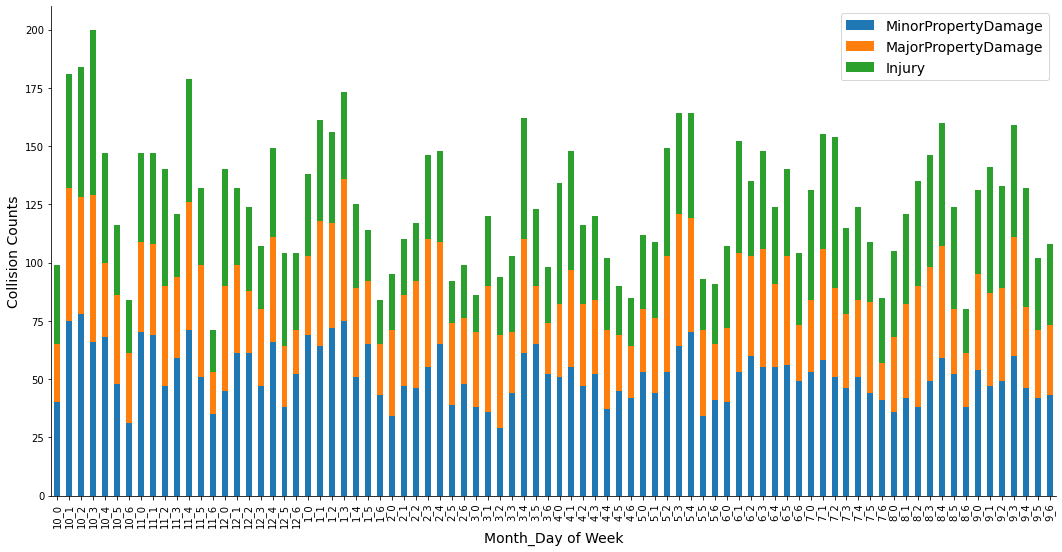

In [22]:
# plot counts vs MM_D to see variations throughout the year 
df_counts = df_sub[df_sub.SeverityFlag==1].groupby(['MM_D']).count()[['SeverityFlag']]
df_counts.rename(columns={'SeverityFlag':'MinorPropertyDamage'}, inplace=True)
df_counts['MajorPropertyDamage'] = df_sub[df_sub.SeverityFlag==2].groupby(['MM_D']).count()[['SeverityFlag']]
df_counts['Injury'] = df_sub[df_sub.SeverityFlag==3].groupby(['MM_D']).count()[['SeverityFlag']]

ax = df_counts.plot(kind="bar", stacked=True,figsize=(18,9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Collision Counts', fontsize=14)
plt.xlabel('Month_Day of Week', fontsize=14)
x_locs, x_labels = plt.xticks()
plt.xticks(x_locs, x_labels,rotation=90)

L=plt.legend(fontsize=14)
plt.savefig('C:/Users/zahra/Documents/ML Courses/Car Collision Project/Month_Day.png')

In [23]:
# define a new weight parameter to represent the probability of having collisions at different months and days
List_MD_MinorPropertyDamage = ['']*(df_sub.shape[0])
List_MD_MajorPropertyDamage = ['']*(df_sub.shape[0])
List_MD_Injury = ['']*(df_sub.shape[0])

# Take the maximum of the three columns to scale
scale = df_counts.max(axis=0).max()

for Ind in df_sub.index:
    List_MD_MinorPropertyDamage[Ind] = df_counts['MinorPropertyDamage'][df_sub['MM_D'][Ind]]/scale
    List_MD_MajorPropertyDamage[Ind] = df_counts['MajorPropertyDamage'][df_sub['MM_D'][Ind]]/scale
    List_MD_Injury[Ind] = df_counts['Injury'][df_sub['MM_D'][Ind]]/scale
df_sub['MD_MinorPropertyDamage'] = List_MD_MinorPropertyDamage
df_sub['MD_MajorPropertyDamage'] = List_MD_MajorPropertyDamage
df_sub['MD_Injury'] = List_MD_Injury
df_sub.head()

,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet,Intersection,...,Passable,ClearWeather,RoadVehicle,Pedestrian,Cyclist,MM_D,H,MD_MinorPropertyDamage,MD_MajorPropertyDamage,MD_Injury
0,2,0,1,0,1,0,0,1,0,1,...,0,1,1,0,0,1_2,08,0.923077,0.576923,0.500000
1,3,0,0,0,1,0,0,1,0,1,...,1,1,1,0,0,1_2,22,0.923077,0.576923,0.500000
2,2,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,1_3,11,0.961538,0.782051,0.474359
3,1,0,1,1,0,0,0,0,1,0,...,0,1,1,0,0,1_5,08,0.833333,0.346154,0.282051
4,2,0,1,1,0,0,0,0,1,1,...,0,0,1,0,0,1_6,13,0.551282,0.282051,0.243590


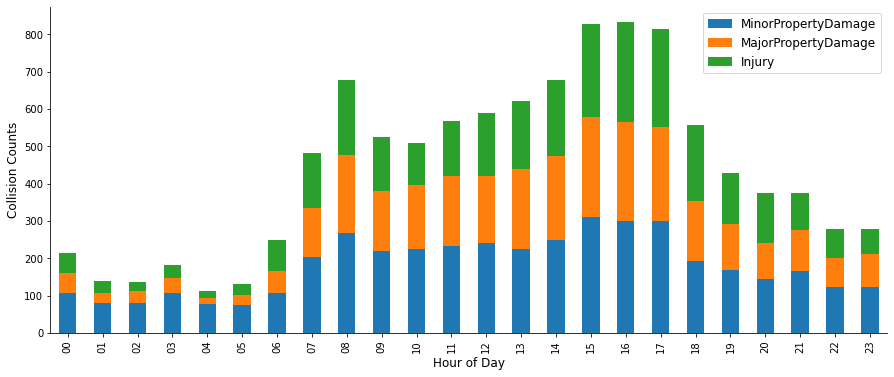

In [24]:
df_counts_H = df_sub[df_sub.SeverityFlag==1].groupby(['H']).count()[['SeverityFlag']]
df_counts_H.rename(columns={'SeverityFlag':'MinorPropertyDamage'}, inplace=True)
df_counts_H['MajorPropertyDamage'] = df_sub[df_sub.SeverityFlag==2].groupby(['H']).count()[['SeverityFlag']]
df_counts_H['Injury'] = df_sub[df_sub.SeverityFlag==3].groupby(['H']).count()[['SeverityFlag']]

ax = df_counts_H.plot(kind="bar", stacked=True,figsize=(15,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Collision Counts', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)

L=plt.legend(fontsize=12)
plt.savefig('C:/Users/zahra/Documents/ML Courses/Car Collision Project/Hour.png')

In [25]:
# define a new weight parameter to represent the probability of having collisions at different hours of a day
List_H_MinorPropertyDamage = ['']*(df_sub.shape[0])
List_H_MajorPropertyDamage = ['']*(df_sub.shape[0])
List_H_Injury = ['']*(df_sub.shape[0])

# Take the maximum of the three columns to scale
scale = df_counts_H.max(axis=0).max()

for Ind in df_sub.index:
    List_H_MinorPropertyDamage[Ind] = df_counts_H['MinorPropertyDamage'][df_sub['H'][Ind]]/scale
    List_H_MajorPropertyDamage[Ind] = df_counts_H['MajorPropertyDamage'][df_sub['H'][Ind]]/scale
    List_H_Injury[Ind] = df_counts_H['Injury'][df_sub['H'][Ind]]/scale
df_sub['H_MinorPropertyDamage'] = List_H_MinorPropertyDamage
df_sub['H_MajorPropertyDamage'] = List_H_MajorPropertyDamage
df_sub['H_Injury'] = List_H_Injury
df_sub.drop(['MM_D','H'], axis=1, inplace=True)
df_sub.head()

,SeverityFlag,ClearWeather,Daylight,Residential,Commercial,Industrial,Motorway,MainArtery,ResidentialStreet,Intersection,...,ClearWeather,RoadVehicle,Pedestrian,Cyclist,MD_MinorPropertyDamage,MD_MajorPropertyDamage,MD_Injury,H_MinorPropertyDamage,H_MajorPropertyDamage,H_Injury
0,2,0,1,0,1,0,0,1,0,1,...,1,1,0,0,0.923077,0.576923,0.500000,0.861290,0.677419,0.645161
1,3,0,0,0,1,0,0,1,0,1,...,1,1,0,0,0.923077,0.576923,0.500000,0.400000,0.245161,0.258065
2,2,0,1,0,1,0,0,1,0,1,...,0,1,0,0,0.961538,0.782051,0.474359,0.751613,0.603226,0.480645
3,1,0,1,1,0,0,0,0,1,0,...,1,1,0,0,0.833333,0.346154,0.282051,0.861290,0.677419,0.645161
4,2,0,1,1,0,0,0,0,1,1,...,0,1,0,0,0.551282,0.282051,0.243590,0.722581,0.693548,0.590323


In [26]:
# Defining feature dataset
X = df_sub.drop(['SeverityFlag'], axis=1, inplace=False)
# Defining severity dataframe
y = df_sub['SeverityFlag']

In [27]:
# Machine Learning

# split the dataset into train, test and evaluation sets
# I will use 0.6 for training, 0.2 for testing, and 0.2 for evaluation
from sklearn.model_selection import train_test_split
X_train, X_test_eval, y_train, y_test_eval = train_test_split( X, y, test_size=0.2, random_state=4)
X_test, X_eval, y_test, y_eval = train_test_split( X_test_eval, y_test_eval, test_size=0.5, random_state=4)
print ('Size of train set: ', X_train.shape,  y_train.shape)
print ('Size of test set: ', X_test.shape,  y_test.shape)
print ('Size of evaluation set: ', X_eval.shape,  y_eval.shape)

Size of train set:  (8471, 24) (8471,)
Size of test set:  (1059, 24) (1059,)
Size of evaluation set:  (1059, 24) (1059,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

Text(0, 0.5, 'f1 score')

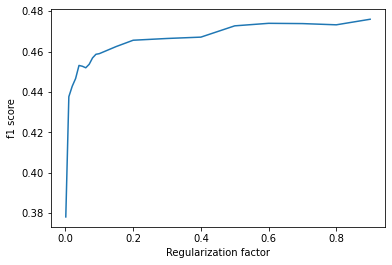

In [29]:
count = 0
cc_array = (0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
f1testSet = np.zeros(20)
for cc in cc_array:
    LR = LogisticRegression(C=cc, solver='liblinear', multi_class='ovr').fit(X_train,y_train)
    yhat_LR = LR.predict(X_test)
    f1testSet[count] = f1_score(y_test, yhat_LR, average='macro')
    count = count + 1

plt.plot(cc_array, f1testSet)
plt.xlabel('Regularization factor')
plt.ylabel('f1 score')

# from plot below I set c = 0.6

In [41]:
# Let's check if I have bias or overfitting issues
# plot training set and test set acuracy vs number of samples 
count = 0
mm_array= np.linspace(3,8003,100,dtype=int)
f1testSet = np.zeros(mm_array.shape)
f1trainSet = np.zeros(mm_array.shape)
for m in mm_array:
    LR = LogisticRegression(C=0.6, solver='liblinear', multi_class='ovr').fit(X_train[:][0:m],y_train[0:m])
    yhat_LR = LR.predict(X_test)
    f1trainSet[count] = f1_score(y_train[0:m],LR.predict(X_train[:][0:m]) , average='macro')
    f1testSet[count] = f1_score(y_test, yhat_LR, average='macro')
    count = count + 1


Text(0, 0.5, 'f1 score')

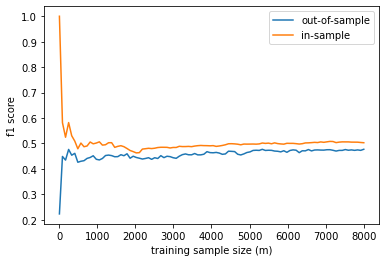

In [42]:
#plt.plot(mm_array, f1testSet)
#plt.plot(mm_array, f1trainSet)
f1_in_out = pd.DataFrame(data=f1testSet,columns=['out-of-sample'])
f1_in_out['in-sample'] = f1trainSet
f1_in_out['m'] = mm_array
f1_in_out.plot.line(x='m')
plt.xlabel('training sample size (m)')
plt.ylabel('f1 score')

# the plot below shows that when I use all samples in my training set, test set and training set acuracies converge, 
# showing I don't have overfitting or bias issues

In [32]:
LR = LogisticRegression(C=0.6, solver='liblinear', multi_class='ovr').fit(X_train,y_train)
yhat_LR_eval = LR.predict(X_eval)
#yhat_LR_eval_P = LR.predict_proba(X_eval)
unique, frequency = np.unique(yhat_LR_eval,  return_counts = True) 
# print unique values array 
print("Unique Values:",   unique) 
# print frequency array 
print("Frequency Values:", frequency)

y_eval.value_counts()

Unique Values: [1 2 3]
Frequency Values: [717 160 182]


1    435
3    315
2    309
Name: SeverityFlag, dtype: int64

In [33]:
print(classification_report(y_eval, yhat_LR_eval))
# 

              precision    recall  f1-score   support

           1       0.49      0.81      0.61       435
           2       0.43      0.22      0.29       309
           3       0.79      0.46      0.58       315

    accuracy                           0.53      1059
   macro avg       0.57      0.50      0.49      1059
weighted avg       0.56      0.53      0.51      1059



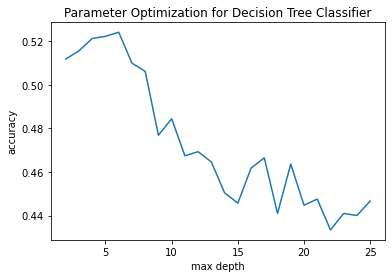

In [34]:
from sklearn.tree import DecisionTreeClassifier
Ks = 25
md_min = 1
met_acc = np.zeros(Ks-1)
md = np.zeros(Ks-1)
for i in range(Ks):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i+md_min)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    met_acc[i-1] = metrics.accuracy_score(y_test, predTree)
    md[i-1] = i + md_min
plt.plot(md,met_acc)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('Parameter Optimization for Decision Tree Classifier')
md_best= met_acc.argmax() + md_min + 1


In [35]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = md_best)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_eval)

print(classification_report(y_eval, predTree))


              precision    recall  f1-score   support

           1       0.49      0.81      0.61       435
           2       0.43      0.24      0.31       309
           3       0.79      0.43      0.56       315

    accuracy                           0.53      1059
   macro avg       0.57      0.49      0.49      1059
weighted avg       0.56      0.53      0.51      1059



In [36]:
md_best

6

In [37]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

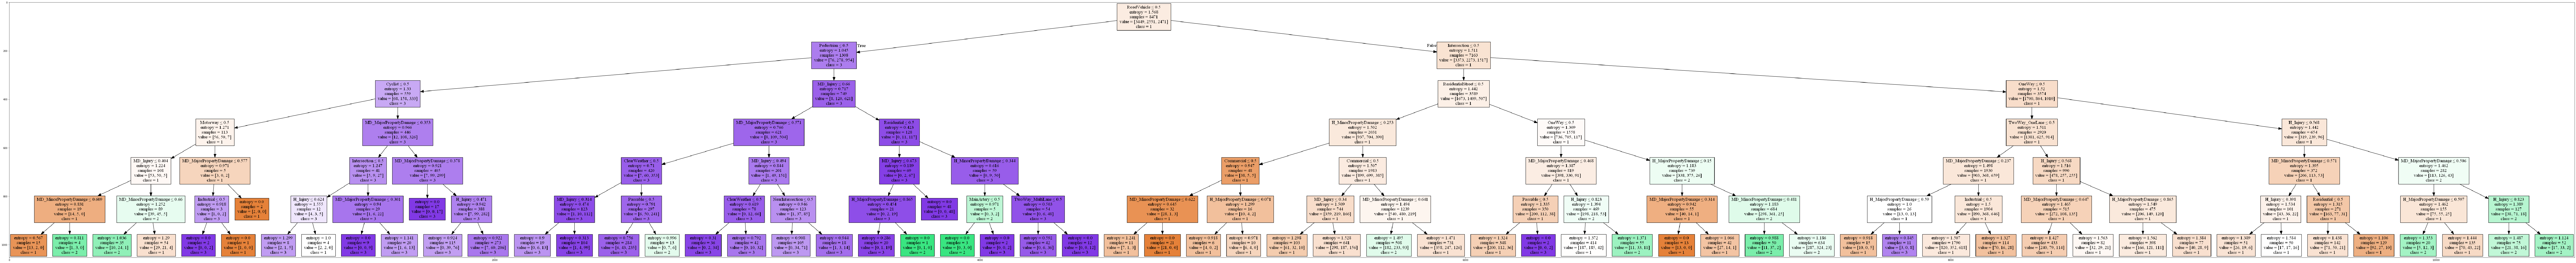

In [40]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = X.columns
targetNames = ['1','2','3'] #y.unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= ['1','2','3'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
n = 3
poly = PolynomialFeatures(n)
X_p_train = poly.fit_transform(X_train)
X_p_test = poly.fit_transform(X_test)
X_p_eval = poly.fit_transform(X_eval)

In [52]:
LR = LogisticRegression(C=0.6, solver='liblinear', multi_class='ovr').fit(X_p_train,y_train)
yhat_LR_eval = LR.predict(X_p_eval)
#yhat_LR_eval_P = LR.predict_proba(X_eval)
unique, frequency = np.unique(yhat_LR_eval,  return_counts = True) 
# print unique values array 
print("Unique Values:",   unique) 
# print frequency array 
print("Frequency Values:", frequency)

y_eval.value_counts()

Unique Values: [1 2 3]
Frequency Values: [615 198 246]


1    435
3    315
2    309
Name: SeverityFlag, dtype: int64

In [53]:
print(classification_report(y_eval, yhat_LR_eval))

              precision    recall  f1-score   support

           1       0.50      0.70      0.58       435
           2       0.41      0.26      0.32       309
           3       0.65      0.51      0.57       315

    accuracy                           0.52      1059
   macro avg       0.52      0.49      0.49      1059
weighted avg       0.52      0.52      0.50      1059

